In [27]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)
import time
import boto3
import os
import requests
import tqdm
import pandas as pd
from dynamodb_json import json_util as json
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratikdomadiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pratikdomadiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pratikdomadiya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pratikdomadiya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/pratikdomadiya/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [28]:
# USE CLEANED DATA DIRECTLY FROM G-DRIVE
url ="https://drive.google.com/file/d/1nTDGojnICIvRZBWoQIPXdiwsfFkE8q98/view?usp=sharing"

new_url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2] #Save into temporary location or into heap
data = pd.read_csv("/Users/pratikdomadiya/Downloads/cleaned (1).csv")
data.head

<bound method NDFrame.head of        Unnamed: 0                                             review  \
0               0  One of the other reviewers has mentioned that ...   
1               1  A wonderful little production. <br /><br />The...   
2               2  I thought this was a wonderful way to spend ti...   
3               3  Basically there's a family where a little boy ...   
4               4  Petter Mattei's "Love in the Time of Money" is...   
...           ...                                                ...   
49995       49995  I thought this movie did a down right good job...   
49996       49996  Bad plot, bad dialogue, bad acting, idiotic di...   
49997       49997  I am a Catholic taught in parochial elementary...   
49998       49998  I'm going to have to disagree with the previou...   
49999       49999  No one expects the Star Trek movies to be high...   

       sentiment                           Review_without_stopwords  \
0              1  one reviewers me

In [29]:
#word cloud for positive review words
df=data
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,Unnamed: 0,review,sentiment,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
0,0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...,one reviewer mentioned watching episode hooked...,"[('one', 'CD'), ('reviewer', 'NN'), ('mentione...",-2.125,Negative
1,1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...,wonderful little production filming technique ...,"[('wonderful', 'JJ'), ('little', 'JJ'), ('prod...",5.000,Positive
2,2,I thought this was a wonderful way to spend ti...,1,thought waswonderful way spend time ontoo hot ...,thought waswonderful way spend time ontoo hot ...,"[('thought', 'VBN'), ('waswonderful', 'JJ'), (...",0.250,Positive
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteilove time money isvisually stunni...,petter matteilove time money isvisually stunni...,"[('petter', 'NN'), ('matteilove', 'NN'), ('tim...",6.625,Positive
5,5,"Probably my all-time favorite movie, a story o...",1,probably time favorite moviestory selflessness...,probably time favorite moviestory selflessness...,"[('probably', 'RB'), ('time', 'NN'), ('favorit...",3.000,Positive


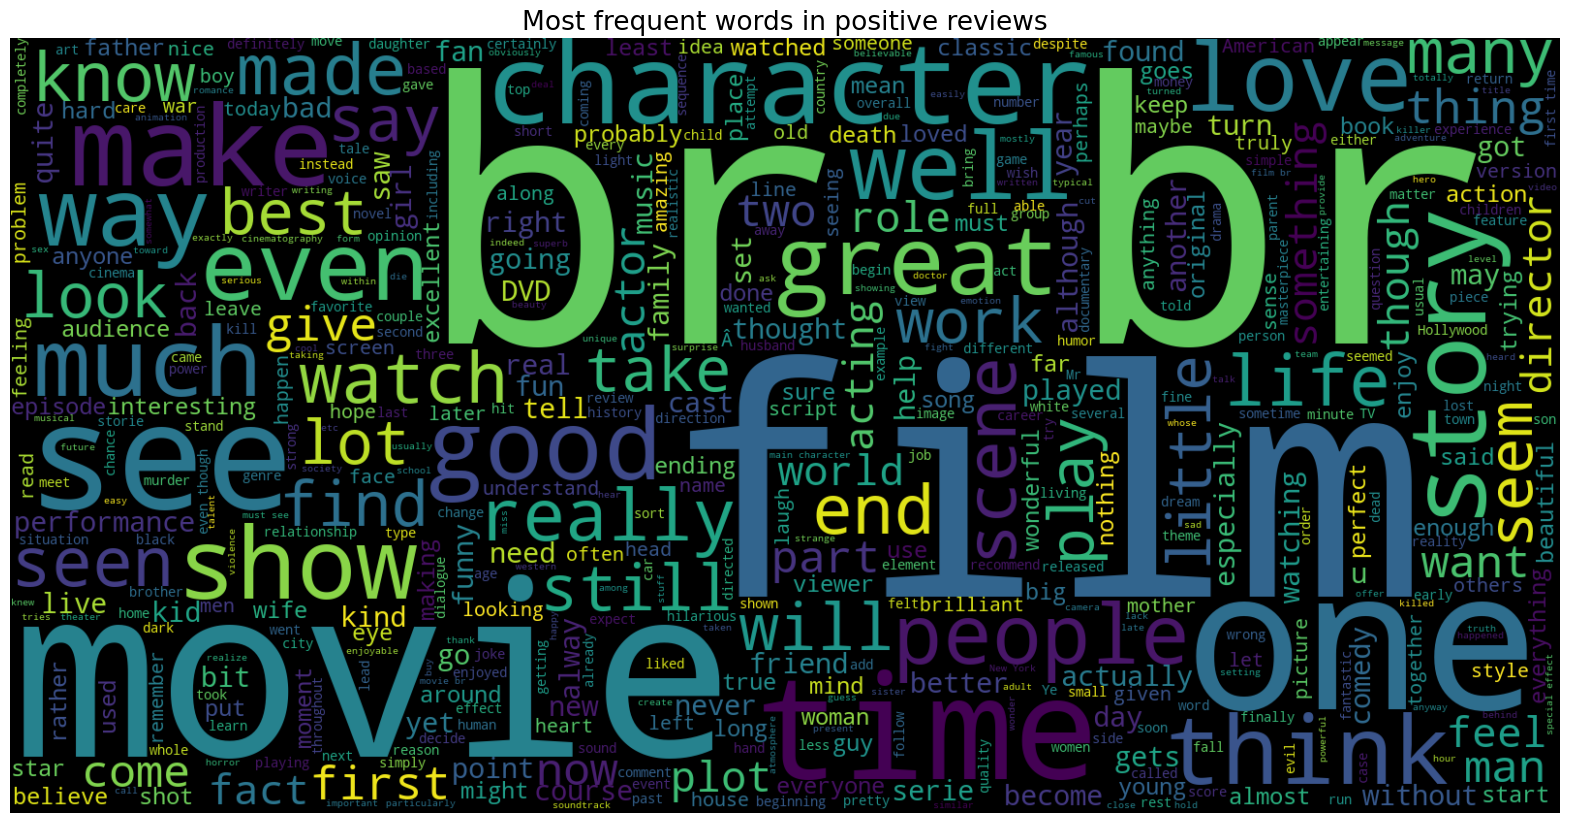

In [30]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [31]:
#word cloud for negitive review words
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,Unnamed: 0,review,sentiment,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
3,3,Basically there's a family where a little boy ...,0,basically therea family wherelittle boy jake t...,basically therea family wherelittle boy jake t...,"[('basically', 'RB'), ('therea', 'JJ'), ('fami...",1.750,Positive
7,7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea 70when firs...,show amazing fresh innovative idea 70when firs...,"[('show', 'NN'), ('amazing', 'JJ'), ('fresh', ...",1.375,Positive
8,8,Encouraged by the positive comments about this...,0,encouraged positive comments film herewas look...,encouraged positive comment film herewas looki...,"[('encouraged', 'VBN'), ('positive', 'JJ'), ('...",1.125,Positive
10,10,Phil the Alien is one of those quirky films wh...,0,phil alien one quirky films humour based aroun...,phil alien one quirky film humour based around...,"[('phil', 'NN'), ('alien', 'VBZ'), ('one', 'CD...",2.250,Positive
11,11,I saw this movie when I was about 12 when it c...,0,saw movie whenwas 12 came outrecall scariest s...,saw movie whenwas came outrecall scariest scen...,"[('saw', 'JJ'), ('movie', 'NN'), ('whenwas', '...",-0.750,Negative


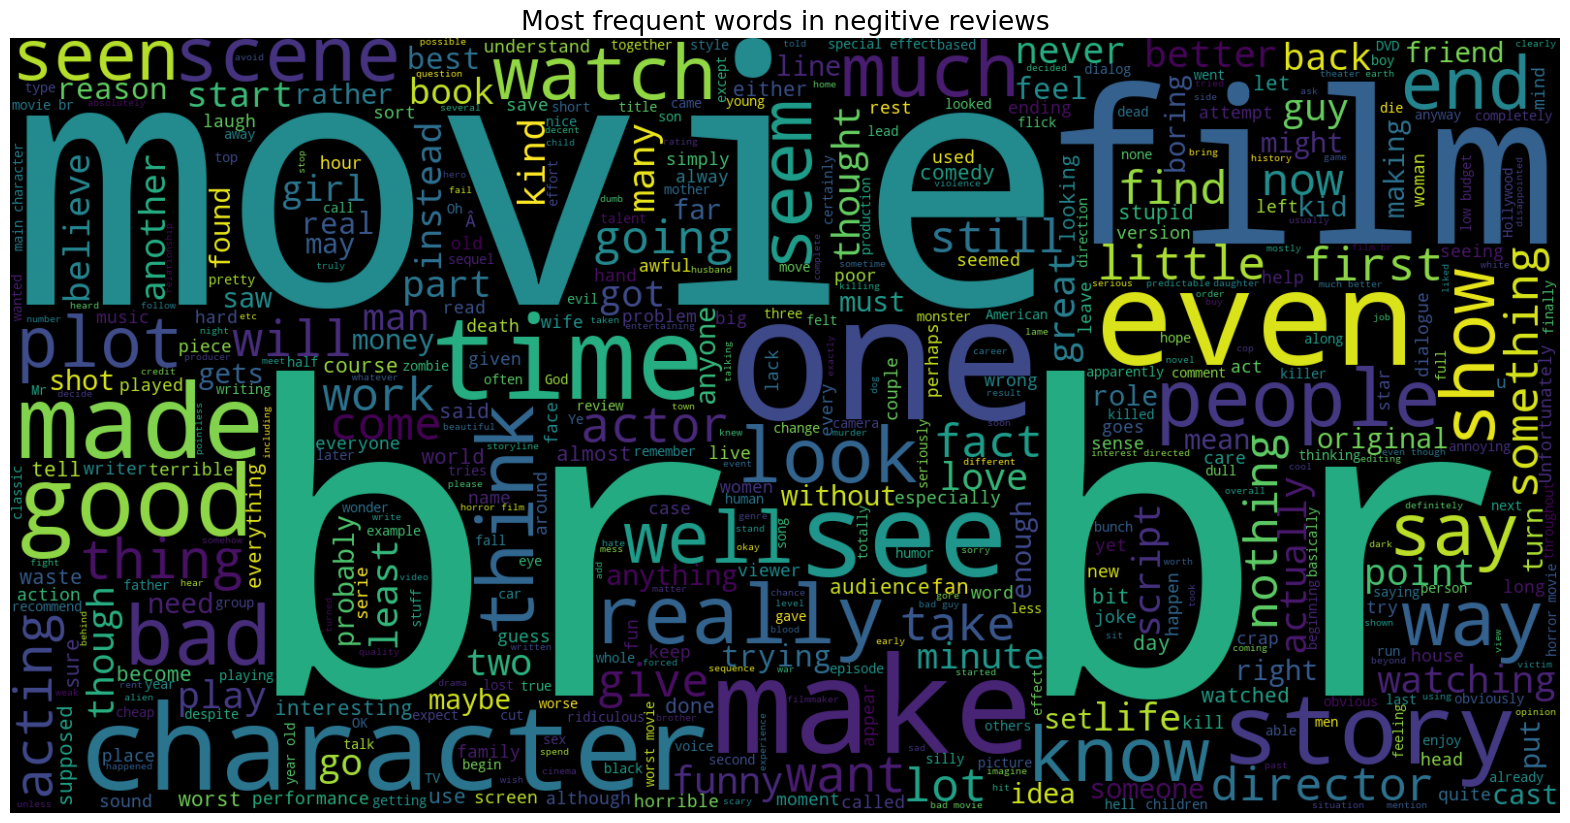

In [32]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negitive reviews', fontsize = 19)
plt.show()

# Most common words in positive, and negative sentiment


In [44]:
from collections import Counter

df['list_of_words'] = df['After_lemmatization'].apply(lambda x:str(x).split()) 
pos_sent = df[df['sentiment']==1]
neg_sent = df[df['sentiment']==0]
common = Counter([item for i in pos_sent['list_of_words'] for item in i])
temp_pos = pd.DataFrame(common.most_common(20))
temp_pos.columns = ['Common_words','count']

In [45]:
fig = px.bar(temp_pos, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [58]:
# d= neg_sent.dropna(inplace=True)
common = Counter([item for i in neg_sent['list_of_words'] for item in i])
temp_neg = pd.DataFrame(common.most_common(20))
temp_neg.columns = ['Common_words','count']

In [54]:
neg_sent.dropna(inplace=True)

Unnamed: 0                  0
review                      0
sentiment                   0
Review_without_stopwords    0
After_lemmatization         0
pos_tags                    0
senti_score                 0
Overall Sentiment           0
list_of_words               0
dtype: int64

In [60]:
fig = px.bar(temp_neg, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()